In [22]:
# basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# modelling, training and evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pickle

from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("dataset/stud.csv")
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
X, y = data.drop("math_score", axis=1), data["math_score"]
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [4]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [8]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns
print("numerical features:\n", num_features)
print("categorical features:\n", cat_features)

numerical features:
 Index(['reading_score', 'writing_score'], dtype='object')
categorical features:
 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [9]:
# columns transformers
scaler = StandardScaler()
one_hot = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder", one_hot, cat_features),
    ("StandardScaler", scaler, num_features)
])

In [10]:

#  applying the column transformer preprocessor
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [12]:
# training and testing split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 21
)
print(X.shape, X_train.shape, X_test.shape)

(1000, 19) (800, 19) (200, 19)


In [13]:
# evaluation func
def model_evaluation(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_sq = r2_score(true, predicted)
    return mae, rmse, r2_sq

In [14]:
# models dict
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [27]:
# training and evaluating the models
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]

    # training
    model.fit(
        X_train, y_train
    )

    # making predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # evaluating on training and testing dataset
    model_train_mae,  model_train_rmse, model_train_r2 = model_evaluation(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = model_evaluation(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('model performance for training set')
    print("- root mean squared error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("-"*35)
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

    # saving the training model
    model_name = list(models.keys())[i].replace(" ", "_").lower()
    filename = f"../models/{model_name}.sav"
    with open(filename, "wb") as f:
        pickle.dump(model, f)

Linear Regression
model performance for training set
- root mean squared error: 5.2564
- Mean Absolute Error: 4.1882
- R2 Score: 0.8811
-----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6131
- Mean Absolute Error: 4.5008
- R2 Score: 0.8554


Lasso
model performance for training set
- root mean squared error: 6.5244
- Mean Absolute Error: 5.1385
- R2 Score: 0.8169
-----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.4524
- Mean Absolute Error: 5.1328
- R2 Score: 0.8089


Ridge
model performance for training set
- root mean squared error: 5.2566
- Mean Absolute Error: 4.1873
- R2 Score: 0.8811
-----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6070
- Mean Absolute Error: 4.4947
- R2 Score: 0.8557


K-Neighbors Regressor
model performance for training set
- root mean squared error: 5.7923
- Mean Absolute Error: 4.6270
- R2 Score: 0.8557
--------------------

In [16]:
# results
pd.DataFrame(
    list(zip(model_list, r2_list)),
    columns = ["Model Name", "R2_Score"]
).sort_values(
    by = ["R2_Score"],
    ascending = False
)

,Model Name,R2_Score
2,Ridge,0.855721
0,Linear Regression,0.855409
7,CatBoosting Regressor,0.832755
5,Random Forest Regressor,0.825936
8,AdaBoost Regressor,0.811802
1,Lasso,0.808932
6,XGBRegressor,0.793972
3,K-Neighbors Regressor,0.754387
4,Decision Tree,0.652481


## Linear Regression

In [17]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 85.54


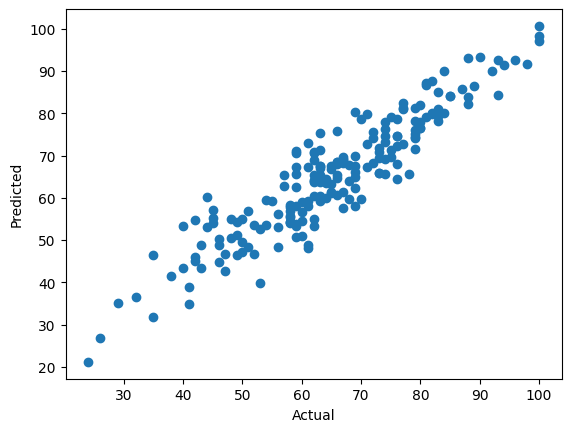

In [18]:
# plotting y_pred and y_test
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

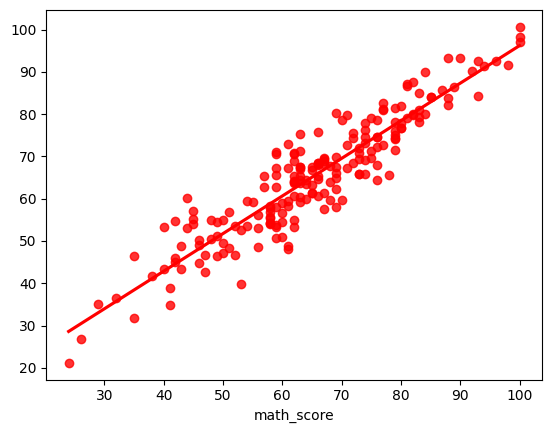

In [19]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [20]:
# difference betwee actual and predicted values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df


,Actual Value,Predicted Value,Difference
492,83,80.994069,2.005931
383,38,41.613670,-3.613670
856,75,69.544494,5.455506
834,58,53.934578,4.065422
603,60,56.620171,3.379829
...,...,...,...
72,41,38.965772,2.034228
400,59,53.742171,5.257829
813,87,85.677418,1.322582
195,61,59.333484,1.666516
